<a href="https://colab.research.google.com/github/HoanDiep/BT10_tuan11/blob/main/handPalm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
folder = '/content/drive/My Drive/Colab Notebooks/handPalm/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('0'):
    output = 0
  elif file.startswith('1'):
    output = 1
  elif file.startswith('2'):
    output = 2
  elif file.startswith('3'):
    output = 3
  elif file.startswith('4'):
    output = 4
  elif file.startswith('5'):
    output = 5
  elif file.startswith('6'):
    output = 6
  else:
    continue
  photo = load_img(folder + file, target_size=(100, 150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [21]:
!cp photos.npy "/content/drive/My Drive/Colab Notebooks/dataset_handPalm"
!cp labels.npy "/content/drive/My Drive/Colab Notebooks/dataset_handPalm"

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/My Drive/Colab Notebooks/dataset_handPalm/photos.npy')
labels = np.load('/content/drive/My Drive/Colab Notebooks/dataset_handPalm/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1)

In [23]:
x_train.shape


(281, 100, 150, 3)

In [24]:
x_test.shape

(32, 100, 150, 3)

In [25]:
x_train = x_train.reshape(281, 100, 150, 3)
x_test = x_test.reshape(32, 100, 150, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [26]:
labels_members = ['giau sang, phu quy',
                  'qua 30 se co thanh tuu',
                  'duong tinh duyen trac tro',
                  'cuoc song gap duoc nhieu may man',
                  'cuoc doi kho so kho khan',
                  'co so dao hoa',
                  'tuoi tho cao']

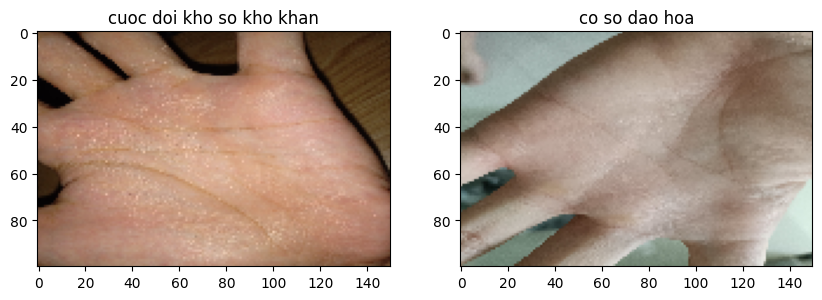

In [27]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("{}".format(labels_members[y_train[0]]))
plt.subplot(122)
plt.imshow(x_test[20], cmap='gray')
plt.title("{}".format(labels_members[y_test[20]]))
plt.show()

In [28]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(100,150, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(64, activation='linear'))

model.add(Dense(7, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 148, 32)       896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 98, 148, 32)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 49, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 49, 74, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 49, 74, 64)        0         
                                                      

In [30]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
9/9 [==============================] - 13s 1s/step - loss: 2.9871 - accuracy: 0.2100
Epoch 2/50
9/9 [==============================] - 9s 1s/step - loss: 1.5854 - accuracy: 0.4235
Epoch 3/50
9/9 [==============================] - 11s 1s/step - loss: 1.1449 - accuracy: 0.5907
Epoch 4/50
9/9 [==============================] - 11s 1s/step - loss: 0.7200 - accuracy: 0.7651
Epoch 5/50
9/9 [==============================] - 11s 1s/step - loss: 0.5000 - accuracy: 0.8149
Epoch 6/50
9/9 [==============================] - 10s 1s/step - loss: 0.2288 - accuracy: 0.9288
Epoch 7/50
9/9 [==============================] - 11s 1s/step - loss: 0.2603 - accuracy: 0.9004
Epoch 8/50
9/9 [==============================] - 11s 1s/step - loss: 0.2041 - accuracy: 0.9324
Epoch 9/50
9/9 [==============================] - 11s 1s/step - loss: 0.1612 - accuracy: 0.9502
Epoch 10/50
9/9 [==============================] - 9s 1s/step - loss: 0.1168 - accuracy: 0.9644
Epoch 11/50
9/9 [========================

In [32]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

1/1 [==============================] - 1s 505ms/step - loss: 0.0810 - accuracy: 0.9688
test_acc: 0.96875
test_loss: 0.08099019527435303


In [33]:
model.save('/content/drive/My Drive/Colab Notebooks/handPalm.h5')

1/1 [==============================] - 0s 139ms/step
co so dao hoa


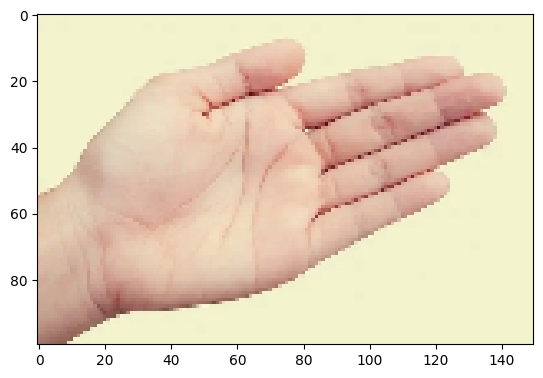

In [36]:
img = load_img('/content/drive/My Drive/Colab Notebooks/chitay.jpg',target_size=(100,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 100, 150, 3)
img = img.astype('float32') / 255
result = labels_members[np.argmax(model.predict(img))]
print(result)
     